# Lab Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the Lab assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the Lab assignment.

## The Dataset

The dataset contains transactions made by credit cards in September 2013 by European cardholders. 
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. \[You will learn about PCA in a later Lesson.\] Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

You can read more about the data and the variables [here](https://www.kaggle.com/mlg-ulb/creditcardfraud).

In [5]:
# You may need these
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc

import matplotlib.pyplot as plt
%matplotlib inline

## Question 1: /5 pts

Read in the `creditcard.csv` dataset and display the first 5 rows.


In [6]:
# Question 1 code here
df = pd.read_csv("creditcard.csv")

## Question 2: /5 pts

Then split the data into train and test for the outcome/response and the predictor variables. Hold out 50% of observations as the test set.  Pass `random_state=0` to `train_test_split` to ensure you get the same train and tests sets as the solution.

In [7]:
# Question 2 code here.

y = df.Class.values
X = df.drop('Class', axis = 'columns').values

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.5, random_state = 0)

## Question 3: /5 pts

Read the documentation for [sklearn's `LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).  In no more than 2 sentences per bullet point, answer the following in your own words.

* Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**YOUR ANSWER HERE:** Yes it uses the L2 loss penalty by default (penalty{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’)
    
* If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients, relative to not applying a penalty during learning?

**YOUR ANSWER HERE:** If no penalty is applied regularization does not occur which could cause overfitting to occur. This would be bad because when the model is applied to other data it may not fit as best it could if regularization occured. 
    
* If using the default settings of `LogisticRegression` in `sklearn`, should you include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**YOUR ANSWER HERE:** If you set the "fit_intercept" parameter = true (which it is by default) it will include a column of 1's which is good because then you get the extra column to train the fit from similar to how we set the betas to a constant first and then train off of all the data.


## Question 4: /15 pts

Create a instance of sklearn's `LogisticRegression` object for unpenalized logistic regression. Note: If you get a warning about convergence of `coef_`, try increasing the `max_iter` parameter.  I used `max_iter=10000` which seems to supress the warning.

Using this object, **run a logisitic regression analysis** of `Class` (y-variable) against `Amount` (x-variable) using your training data. 

Then **make a scatter-plot of `Amount` and `Outcome` on your test data** and add the class prediction (0 or 1, using `predict`) and the predicted probability of a positive outcome (using `predict_proba`). Note that `predict_proba` will return both p(Outcome=0) and p(Outcome=1).

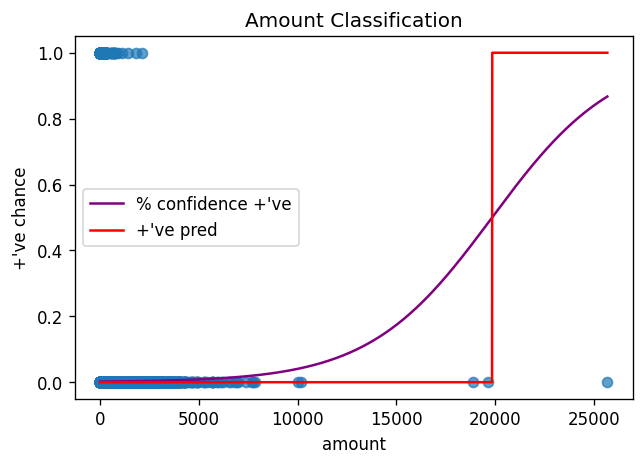

In [8]:
# Question 4 code here

Xtrainamount = Xtrain[:,29]
Xtestamount = Xtest[:,29]
XtrainamountT = Xtrainamount.reshape(-1,1)
XtestamountT = Xtestamount.reshape(-1,1)
creditAmountLR = LogisticRegression(penalty='none', max_iter = 10000)
creditAmountLR.fit(XtrainamountT, ytrain)

x_line = np.linspace(XtestamountT.min(), XtestamountT.max(), 5000)
x_lineT = x_line.reshape(-1,1)

y_testprob = creditAmountLR.predict_proba(XtestamountT)[:,-1]
y_probline = creditAmountLR.predict_proba(x_lineT)
y_boolline = y_probline >= 0.5

fig, ax = plt.subplots(dpi = 120)
ax.set_title("Amount Classification")
ax.set_xlabel("amount")
ax.set_ylabel("+'ve chance")
sns.lineplot(x=x_lineT[:,-1], y = y_probline[:,-1], ci=None, sort = 1, ax=ax, label = "% confidence +'ve", color = "purple")
sns.lineplot(x=x_lineT[:,-1], y = y_boolline[:,-1], ci=None, sort = 1, ax=ax, label = "+'ve pred", color = "red")
ax.scatter(Xtestamount, ytest, alpha = 0.7)
plt.show()

## Question 5: 15 pts

Compute the label-based criteria we discussed in the Lesson for your amount-only classifier **using the test data**. Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER HERE:** fp = 1 so only 1 is labeled positive (and incorrectly)

* Choose one of the positively-labeled test instances, and explain why the classifier labeled it positive.

**YOUR ANSWER HERE:**  there aren't any pieces of data in the training set as high as the labeled one, basically meaning that anything is possible and the rest of the criteria also indicate a very poor fit

* Is this classifier useful for finding fraudulent transactions? Explain in one or two sentences.

**YOUR ANSWER HERE:** Since the recall is 0.0 I don't think the classifier is any good at flagging fraudulent transactions. With the numbers being the way they are it seems more like lucky chances that this model flagged any fraudulent transactions.


**OUTPUT**
tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 
Recall: 0.0 
Precision: 0.0 
Sensitivity: 0.0 
Specificity: 0.9999929657

In [9]:
# Calculate performance measures from scratch
# TP: true postives 
# TN: true negatives 
# FP: False positives 
# FN: False negatives
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,10))

## Put code here to compute criteria:

y_testbool = y_testprob >= 0.5
compute_performance(y_testbool, ytest, (0,1))   

## Put code here to compute whatever else you might need to answer the question.

tp: 0 tn: 142160 fp: 1 fn: 243
Accuracy: 0.998 Recall: 0.0 Precision: 0.0 Sensitivity: 0.0 Specificity: 0.9999929657


## Question 6: /10 pts
Now fit a logistic regression model to the training data and include all the variables in the data frame in the cell below. You will want to make a new object like you did for the simpler model. Answer the following question.

* According to this more complex model, are larger or smaller Amounts more strongly associated with fraud, if all other variables are held equal?

**YOUR ANSWER HERE:** since the last coefficient is negative: the greater the amount, the more strongly associated it is with fraud

In [10]:
# Code for Question 6

CREDITLR = LogisticRegression(penalty='none', max_iter = 10000)
creditLR = CREDITLR.fit(Xtrain, ytrain)
outcome = creditLR.predict_proba(Xtest)[:,-1]

## Question 7: /15 pts

In the cell below, Compute the label-based criteria we discussed in the Lesson for new classifier using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. Answer the questions in this text box below.

* How many of the test instances are labeled positive by your classifier?

**YOUR ANSWER:** tp + fp = 151 + 29 = 180 instances labeled positive 

* Is this classifier **better or worse than the amount-only classifier** for finding fraudulent transactions? Explain in one or two sentences.*

**YOUR ANSWER:** SO MUCH BETTER. There is extremely notable improvement in each criterium. Very good accuracy and specificity. Even though the recall and sensitivity are not as high that they would indicate a "perfect" model, they are so much better that the 0.0's seen in the more simplified models. 


**OUTPUT**
tp: 151 tn: 142132 fp: 29 fn: 92
Accuracy: 0.999 
Recall: 0.621 
Precision: 0.839 
Sensitivity: 0.621 
Specificity: 0.9997960059

In [11]:
# Code for Question 7

Xpredict = outcome >= 0.5
compute_performance(Xpredict, ytest, (0,1))  

tp: 151 tn: 142132 fp: 29 fn: 92
Accuracy: 0.999 Recall: 0.621 Precision: 0.839 Sensitivity: 0.621 Specificity: 0.9997960059


# Question 8: /15 pts

Plot ROC curves for both of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

* Which classifier has a higher estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

**YOUR ANSWER:** The All Classifier has a slight advantage due to the slightly better accuracy (Accuracies area as follows: All = 0.999 & Amount-only = 0.998)

* How could you explain a result where a logistic regression classifier produces an AUROC that is "worse than random", i.e. less than 0.5, even on its training set?

**YOUR ANSWER:** The classifier algorithm has logical errors in this case. A consistantly bad classifier is (for all intents and purposes) just a consistantly good classifier that has been flipped around. 


# Took code from here to get this working so figured I would document it
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

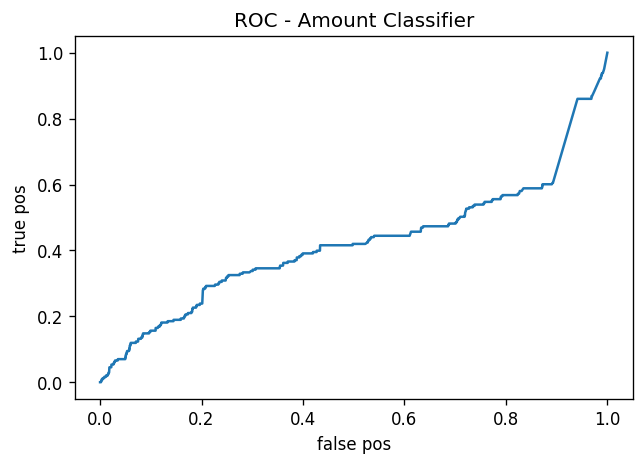

In [12]:
# ROC for Amount-only classifier
fpr, tpr, threshold = roc_curve(ytest, y_testprob, pos_label = 1)

fig, ax = plt.subplots(dpi = 120)
ax.set_title("ROC - Amount Classifier")
ax = sns.lineplot(x = fpr,y = tpr)
ax.set_xlabel('false pos')
ax.set_ylabel('true pos')
plt.show()

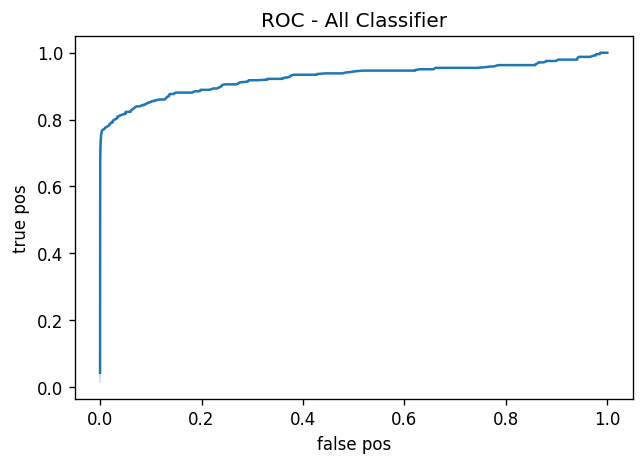

In [13]:
# ROC for all-variable classifier
fpr, tpr, threshold = roc_curve(ytest, outcome, pos_label = 1)

fig, ax = plt.subplots(dpi = 120)
ax.set_title("ROC - All Classifier")
ax = sns.lineplot(x = fpr,y = tpr)
ax.set_xlabel('false pos')
ax.set_ylabel('true pos')
plt.show()

# Question 9: /15 pts

Plot precision-recall curves for both of your classifiers using the cell below. Be sure to label your axes.

* Which classifier is preferable if we want to recover at least 60% of fraudulent transactions?

**YOUR ANSWER:** this would be signified by a precision score of at least 0.60 which the ammount classifier doesn't have (precision = 0.0) so therefore we would have to use the all classifier (precision = 0.839 or 84%) 


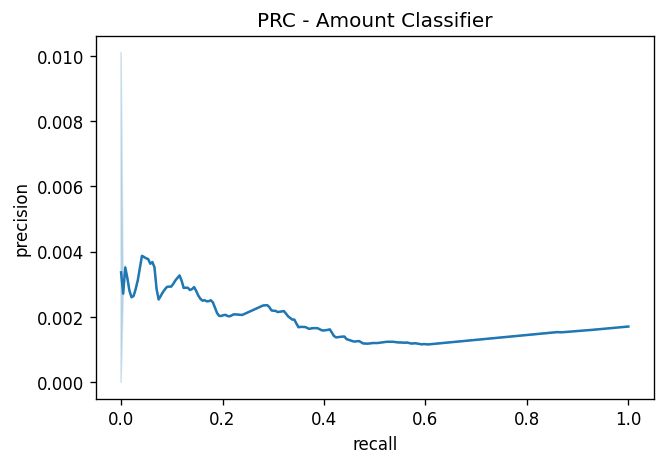

In [14]:
# PRC for Amount-only classifier
precision, recall, threshold = precision_recall_curve(ytest, y_testprob, pos_label = 1)

fig, ax = plt.subplots(dpi = 120)
ax.set_title("PRC - Amount Classifier")
ax = sns.lineplot(x = recall,y = precision)
ax.set_xlabel('recall')
ax.set_ylabel('precision')
plt.show()

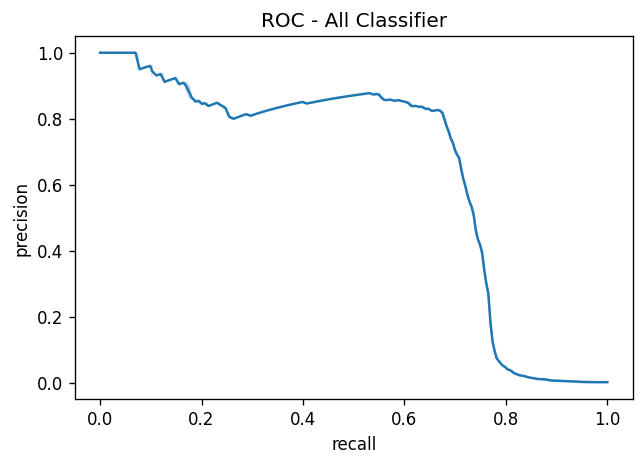

In [15]:
# PRC for all-variable classifier
precision, recall, threshold = precision_recall_curve(ytest, outcome, pos_label = 1)

fig, ax = plt.subplots(dpi = 120)
ax.set_title("ROC - All Classifier")
ax = sns.lineplot(x = recall,y = precision)
ax.set_xlabel('recall')
ax.set_ylabel('precision')
plt.show()

# The end